In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.svm import SVC 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [2]:
wine = pd.read_csv('winequality-red.csv')
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
reviews = []

for i in wine['quality']:
    if i <= 5:
        reviews.append('0')
    elif i >= 6:
        reviews.append('1')
wine['Reviews'] = reviews

wine_2 = wine.drop(columns='quality')
wine_2.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Reviews
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [4]:
reviews = []

for i in wine['quality']:
    if i <= 4:
        reviews.append('0')
    elif i >= 5 and i <=6:
        reviews.append('1')
    elif i >= 7:
        reviews.append('2')    
        
wine['Reviews'] = reviews

wine_3 = wine.drop(columns='quality')
wine_3.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Reviews
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1


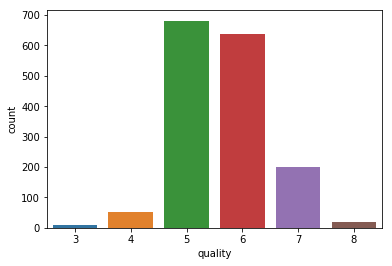

In [5]:
#count of the target variable
sns.countplot(x='quality', data=wine)

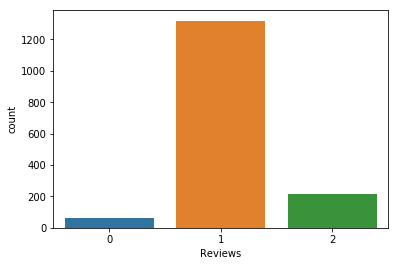

In [6]:
sns.countplot(x='Reviews', data=wine)

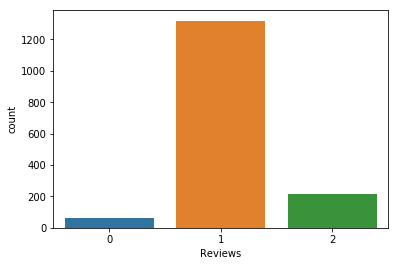

In [7]:
sns.countplot(x='Reviews', data=wine_3)

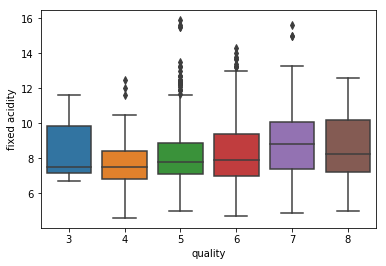

In [8]:
sns.boxplot('quality','fixed acidity', data=wine)

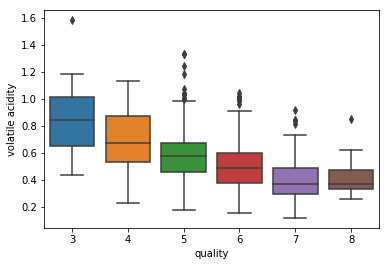

In [9]:
sns.boxplot('quality','volatile acidity', data=wine)

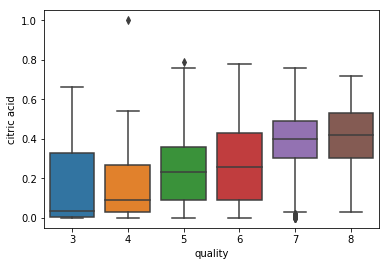

In [10]:
sns.boxplot('quality','citric acid', data=wine)

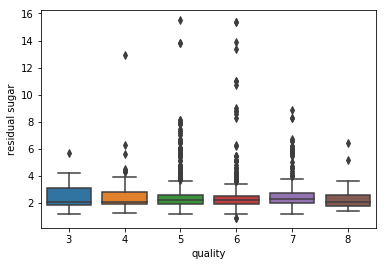

In [11]:
sns.boxplot('quality','residual sugar', data=wine)

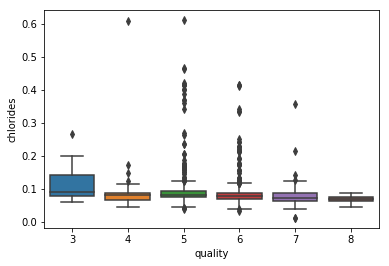

In [12]:
sns.boxplot('quality','chlorides', data=wine)

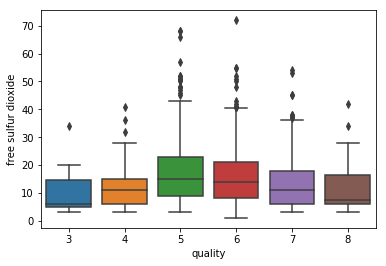

In [13]:
sns.boxplot('quality','free sulfur dioxide', data=wine)

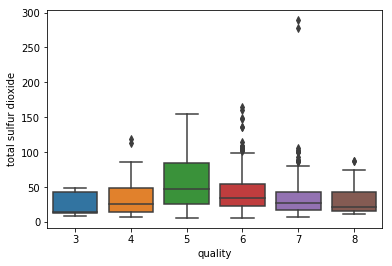

In [14]:
sns.boxplot('quality','total sulfur dioxide', data=wine)

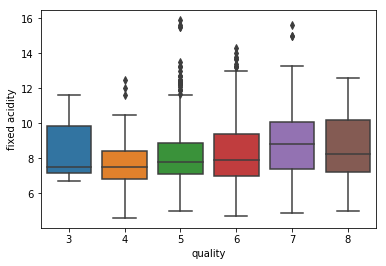

In [15]:
sns.boxplot('quality','fixed acidity', data=wine)

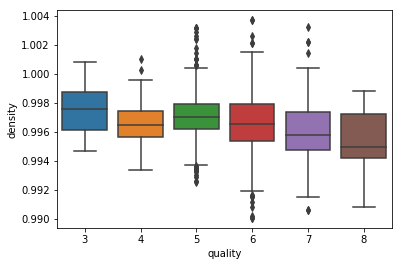

In [16]:
sns.boxplot('quality','density', data=wine)

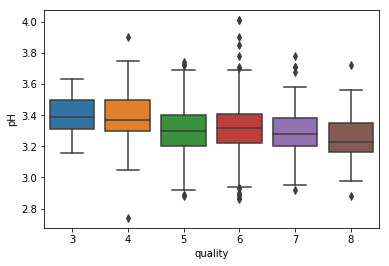

In [17]:
sns.boxplot('quality','pH', data=wine)

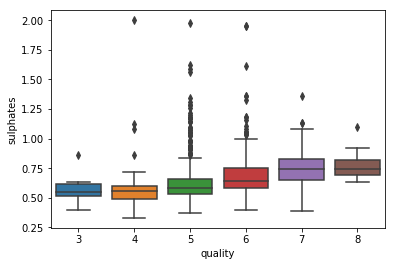

In [18]:
sns.boxplot('quality','sulphates', data=wine)

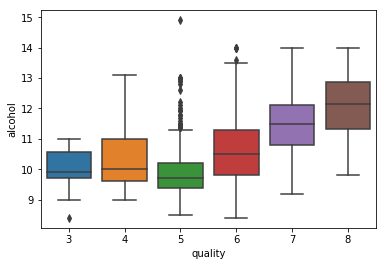

In [19]:
sns.boxplot('quality','alcohol', data=wine)

In [73]:
#SVC WITH NO BINS

#add x columns here
X = wine.drop("quality", axis=1)
y = wine["quality"]
print(X.shape, y.shape)

(1599, 12) (1599,)


In [77]:
# Split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=1)

In [78]:
# Support vector machine linear classifier
model = SVC(kernel='linear')
model.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [79]:
# Model Accuracy
print('Test Acc: %.3f' % model.score(X_test, y_test))

Test Acc: 0.750


In [60]:
print(X_test.shape)
y.unique()

(480, 12)


array([5, 6, 7, 4, 8, 3], dtype=int64)

In [61]:
# Calculate classification report
target_names = ["3", "4", "5", "6", "7", "8"]
predictions = model.predict(X_test)
print(classification_report(y_test, predictions,
                            target_names=target_names))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.84      1.00      0.91        16
           5       0.71      0.77      0.74       204
           6       0.73      0.66      0.69       192
           7       0.92      1.00      0.96        60
           8       0.00      0.00      0.00         5

   micro avg       0.75      0.75      0.75       480
   macro avg       0.53      0.57      0.55       480
weighted avg       0.74      0.75      0.74       480



C:\Users\Nathan Deering\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Nathan Deering\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Nathan Deering\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [52]:
#---------------SVC WITH 2 BINS---------------#

#add x columns here
X = wine_2.drop("Reviews", axis=1)
y = wine_2["Reviews"]
print(X.shape, y.shape)

(1599, 11) (1599,)


In [53]:
# Split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=1)

In [54]:
# Support vector machine linear classifier
model = SVC(kernel='linear')
model.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [55]:
# Model Accuracy
print('Test Acc: %.3f' % model.score(X_test, y_test))

Test Acc: 0.721


In [30]:
# Calculate classification report
target_names = ["Bad", "Good"]

predictions = model.predict(X_test)
print(classification_report(y_test, predictions,
                            target_names=target_names))

              precision    recall  f1-score   support

         Bad       0.67      0.78      0.72       223
        Good       0.78      0.67      0.72       257

   micro avg       0.72      0.72      0.72       480
   macro avg       0.73      0.72      0.72       480
weighted avg       0.73      0.72      0.72       480



In [31]:
#---------------SVC WITH 3 BINS---------------#
#add x columns here
X = wine_3.drop("Reviews", axis=1)
y = wine_3["Reviews"]
print(X.shape, y.shape)

(1599, 11) (1599,)


In [32]:
# Split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.45, stratify=y, random_state=1)

In [33]:
# Support vector machine linear classifier
model = SVC(kernel='linear')
model.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [34]:
# Model Accuracy
print('Test Acc: %.3f' % model.score(X_test, y_test))

Test Acc: 0.825


In [35]:
# Calculate classification report
target_names = ["Bad", "Average", "Good"]

predictions = model.predict(X_test)
print(classification_report(y_test, predictions,
                            target_names=target_names))

              precision    recall  f1-score   support

         Bad       0.00      0.00      0.00        28
     Average       0.82      1.00      0.90       594
        Good       0.00      0.00      0.00        98

   micro avg       0.82      0.82      0.82       720
   macro avg       0.27      0.33      0.30       720
weighted avg       0.68      0.82      0.75       720



C:\Users\Nathan Deering\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Nathan Deering\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Nathan Deering\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [36]:
#---------------KNN WITH NO BINS---------------#

#add x columns here
X = wine.drop("quality", axis=1)
y = wine["quality"]
print(X.shape, y.shape)

(1599, 12) (1599,)


k: 1, Train/Test Score: 1.000/0.815
k: 3, Train/Test Score: 0.883/0.794
k: 5, Train/Test Score: 0.860/0.786
k: 7, Train/Test Score: 0.853/0.819
k: 9, Train/Test Score: 0.841/0.818
k: 11, Train/Test Score: 0.836/0.819
k: 13, Train/Test Score: 0.836/0.812
k: 15, Train/Test Score: 0.836/0.826
k: 17, Train/Test Score: 0.838/0.824
k: 19, Train/Test Score: 0.833/0.819


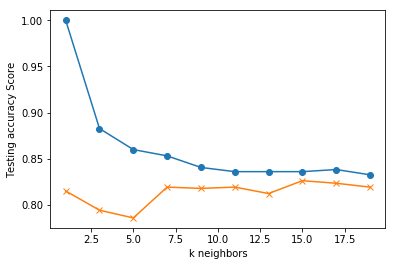

In [37]:
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [38]:
# Note that k: 13 seems to be the best choice for this dataset
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
print('k=5 Test Acc: %.3f' % knn.score(X_test, y_test))

k=5 Test Acc: 0.786


In [39]:
#---------------KNN WITH 3 BINS---------------#

#add x columns here
X = wine_3.drop("Reviews", axis=1)
y = wine_3["Reviews"]
print(X.shape, y.shape)

(1599, 11) (1599,)


In [40]:
# Split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

k: 1, Train/Test Score: 1.000/0.797
k: 3, Train/Test Score: 0.897/0.803
k: 5, Train/Test Score: 0.875/0.800
k: 7, Train/Test Score: 0.858/0.797
k: 9, Train/Test Score: 0.849/0.787
k: 11, Train/Test Score: 0.847/0.794
k: 13, Train/Test Score: 0.837/0.797
k: 15, Train/Test Score: 0.840/0.797
k: 17, Train/Test Score: 0.841/0.787
k: 19, Train/Test Score: 0.844/0.791


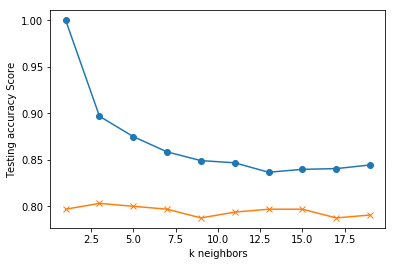

In [41]:
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [42]:
# Note that k: 13 seems to be the best choice for this dataset
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
print('k=5 Test Acc: %.3f' % knn.score(X_test, y_test))

k=5 Test Acc: 0.800


In [43]:
#---------------KNN WITH 2 BINS---------------#

X = wine_2.drop("Reviews", axis=1)
y = wine_2["Reviews"]
print(X.shape, y.shape)

(1599, 11) (1599,)


In [44]:
# Split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

k: 1, Train/Test Score: 1.000/0.647
k: 3, Train/Test Score: 0.819/0.620
k: 5, Train/Test Score: 0.773/0.620
k: 7, Train/Test Score: 0.737/0.598
k: 9, Train/Test Score: 0.726/0.605
k: 11, Train/Test Score: 0.721/0.603
k: 13, Train/Test Score: 0.711/0.600
k: 15, Train/Test Score: 0.706/0.605
k: 17, Train/Test Score: 0.700/0.625
k: 19, Train/Test Score: 0.702/0.627


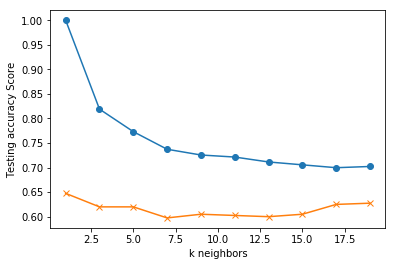

In [45]:
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [46]:
# Note that k: 5 seems to be the best choice for this dataset
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
print('k=5 Test Acc: %.3f' % knn.score(X_test, y_test))

k=5 Test Acc: 0.620


In [64]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [83]:
X = wine[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates','alcohol']].values
y = wine['quality'].values

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=1)

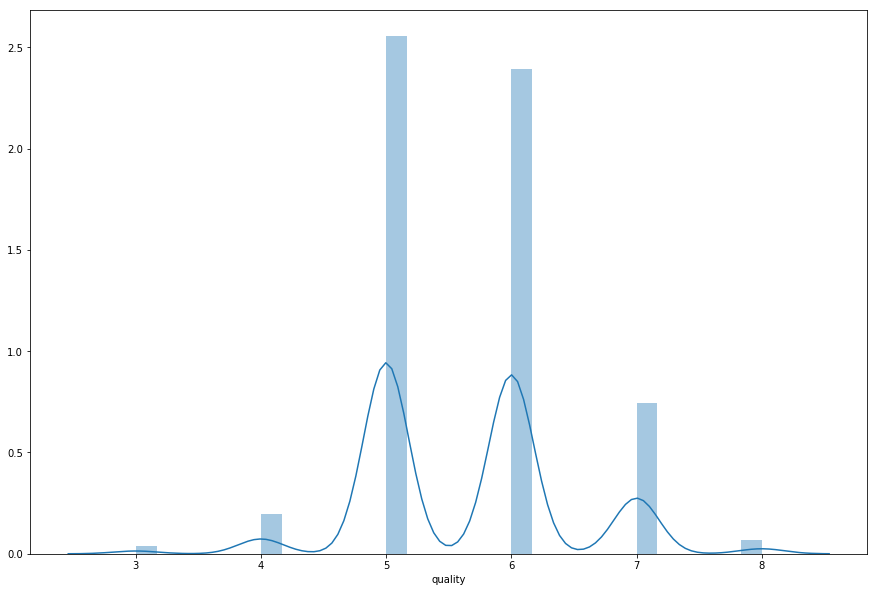

In [85]:
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(wine['quality'])